## SEC Financial Statement and Notes Data Set Tables

Download [Financial Statement and Notes Data Sets](https://www.sec.gov/data-research/sec-markets-data/financial-statement-notes-data-sets) and unzip into folder YYYYqQ_notes. See [Documentation](https://www.sec.gov/files/aqfsn_1.pdf)
 
• SUB – Submission data set; this includes one record for each XBRL submission. The set includes fields
of information pertinent to the submission and the filing entity. Information is extracted from the
Commission's EDGAR system and the filings submitted to the Commission by registrants.

• TAG – Tag data set; includes defining information about each tag. Information includes tag
descriptions (documentation labels), taxonomy version information and other tag attributes.

• DIM – Dimension data set; used to provide more detail in numeric and non-numeric facts.

• NUM – Number data set; this includes one row for each distinct amount from each submission
included in the SUB data set. The Number data set includes, for every submission, all line item values
as rendered by the Commission Viewer/Previewer.

• TXT – Text data set; this is the plain text of all the non-numeric tagged items in the submission.

• REN – Rendering data set; this contains data from the rendering of the filing on the Commission
website.

• PRE – Presentation data set; this provides information about how the tags and numbers were
presented in the primary financial statements.

• CAL – C alculation data set; provides information to arithmetically relate tags in a filing.

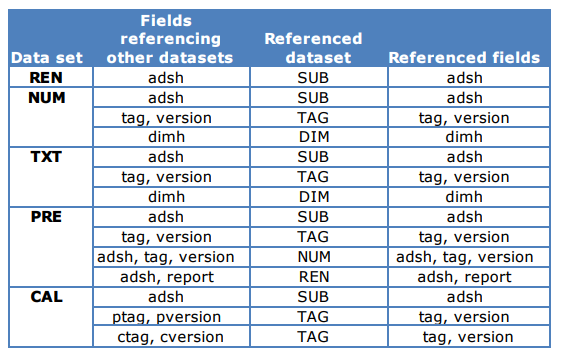

The Accession Number (adsh) found in the NUM data set can be used to retrieve information about the submission in SUB. Each row of data in NUM or TXT
was tagged by the filer using a tag. Information about the tag used can be found in TAG. Each row of data in NUM or TXT appears on one or more lines of reports detailed in PRE.

In [25]:
import duckdb
import pandas as pd

sql_cik: str =  "(1164727, 2809, 756894, 1323404, 886986, 1456346, 1725964, 1009001, 1589239, 701818)"
# Connect to DuckDB (in-memory database by default)
con = duckdb.connect()
yearq = "2023q1"

def load_tsv(quarter, table):
    # Load the TSV file into a table ../2023q1_notes/sub.tsv
    df = pd.read_csv(f"../{quarter}_notes/{table}.tsv", delimiter='\t')
    con.execute(f"DROP TABLE IF EXISTS {table};")
    con.execute(f"CREATE TABLE {table} AS SELECT * FROM df")
    return df


**SUB** identifies all the EDGAR submissions in the data set, with each row having the unique (primary) key adsh, a 20 character EDGAR Accession Number with dashes in positions 11 and 14.

In [26]:
df = load_tsv(yearq, "sub")
duckdb.sql(f"SELECT * FROM df WHERE cik IN {sql_cik};")

┌──────────────────────┬─────────┬───────────────────────────────┬────────┬───────────┬─────────┬──────────────────────┬─────────┬───────────────────────────────┬────────────────────────────┬────────────────┬───────────┬─────────┬────────────────┬─────────┬───────────────────────────────┬────────────────────────────┬────────────┬─────────┬───────────┬────────────────────────────┬────────────┬─────────┬───────┬────────┬─────────┬────────────┬────────┬─────────┬──────────┬───────────────────────┬─────────┬────────┬────────────────────────────┬───────┬─────────┬───────────────┬────────────┬───────────┬───────────┐
│         adsh         │   cik   │             name              │  sic   │ countryba │ stprba  │        cityba        │  zipba  │             bas1              │            bas2            │      baph      │ countryma │ stprma  │     cityma     │  zipma  │             mas1              │            mas2            │ countryinc │ stprinc │    ein    │           former           

**TAG** is a data set of all tags used in the submissions, both standard and custom. These fields
comprise a unique compound key:
1) tag – tag used by the filer
2) version – if a standard tag, the taxonomy of origin, otherwise equal to adsh.

In [27]:
df2 = load_tsv(yearq, "tag")
duckdb.sql(f"SELECT * FROM df2 limit 10;")

┌───────────────────────────────────────────────────────────────────────────────────────────────┬──────────────────────┬────────┬──────────┬──────────┬─────────┬─────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬────────────────────────────────────┐
│                                              tag                                              │       version        │ custom │ abstract │ datatype │  iord   │  crdr   │                                                       tlabel                                                        │                doc                 │
│                                            varchar                                            │       varchar        │ int64  │  int64   │ varchar  │ varchar │ varchar │                                                       varchar                                                       │              varchar               │
├──────────────────

**DIM** is a data set containing XBRL dimensional tags. The unique key of each row is a 16-byte hexadecimal value:
1) dimh - 0 representing no XBRL dimensions, otherwise the MD5 hash of the dimension tags.
(The MD5 algorithm is a widely used hash function producing a 128-bit hash value, conventionally shown in human readable form as a 32-byte string.)

In [28]:
df3 = load_tsv(yearq, "dim")
duckdb.sql(f"SELECT * FROM df3 limit 10;")

┌────────────────────────────────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬───────┐
│              dimhash               │                                                                                                                           segments                                                                                                                           │ segt  │
│              varchar               │                                                                                                                           varchar                                                                                                                            │ int64 │
├────────────────────────────────────┼────────────────────────────────────────────────────────

**NUM** is a data set of all numeric XBRL facts presented on the primary financial statements. These fields comprise a unique compound key:
1) adsh - EDGAR accession number
2) tag - tag used by the filer
3) version – if a standard tag, the taxonomy of origin, otherwise equal to adsh.
4) ddate - period end date
5) qtrs - duration in number of quarters
6) uom - unit of measure
7) dimh - 16-byte dimensional qualifier
8) iprx - a sequential integer used to distinguish otherwise identical facts

In [20]:
df4 = load_tsv(yearq, "num")
duckdb.sql(f"SELECT * FROM df4 limit 10;")

/tmp/ipykernel_163973/2048256324.py:11: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"../{quarter}_notes/{table}.tsv", delimiter='\t')


┌──────────────────────┬──────────────────────────────────────────────────────┬──────────────────────┬──────────┬───────┬─────────┬────────────┬───────┬─────────────┬──────────┬─────────┬───────┬─────────┬────────┬────────┬───────┐
│         adsh         │                         tag                          │       version        │  ddate   │ qtrs  │   uom   │    dimh    │ iprx  │    value    │ footnote │ footlen │ dimn  │  coreg  │  durp  │  datp  │ dcml  │
│       varchar        │                       varchar                        │       varchar        │  int64   │ int64 │ varchar │  varchar   │ int64 │   double    │ varchar  │  int64  │ int64 │ varchar │ double │ double │ int64 │
├──────────────────────┼──────────────────────────────────────────────────────┼──────────────────────┼──────────┼───────┼─────────┼────────────┼───────┼─────────────┼──────────┼─────────┼───────┼─────────┼────────┼────────┼───────┤
│ 0000002178-23-000038 │ AccountsPayableCurrent                         

**TXT** is a data set that contains the plain (no HTML) text of each non-numeric XBRL fact. These fields
comprise a unique compound key:
1) adsh - EDGAR accession number
2) tag – tag used by the filer
3) version – if a standard tag, the taxonomy of origin, otherwise equal to adsh
4) ddate - period end date
5) qtrs - duration in number of quarters
6) dimh - dimension hash value
7) iprx - a sequential integer used to distinguish otherwise identical facts

In [21]:
df5 = load_tsv(yearq, "txt")
duckdb.sql(f"SELECT * FROM df5 limit 10;")

/tmp/ipykernel_163973/2048256324.py:11: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"../{quarter}_notes/{table}.tsv", delimiter='\t')


┌──────────────────────┬──────────────────────────────┬──────────┬──────────┬───────┬───────┬─────────┬───────┬────────┬────────┬────────────┬───────┬─────────┬─────────┬────────┬────────┬──────────┬─────────┬──────────────────────────────────────────────────────┬────────────────────────────┐
│         adsh         │             tag              │ version  │  ddate   │ qtrs  │ iprx  │  lang   │ dcml  │  durp  │  datp  │    dimh    │ dimn  │  coreg  │ escaped │ srclen │ txtlen │ footnote │ footlen │                       context                        │           value            │
│       varchar        │           varchar            │ varchar  │  int64   │ int64 │ int64 │ varchar │ int64 │ double │ double │  varchar   │ int64 │ varchar │  int64  │ int64  │ int64  │ varchar  │  int64  │                       varchar                        │          varchar           │
├──────────────────────┼──────────────────────────────┼──────────┼──────────┼───────┼───────┼─────────┼───────┼───────

**REN** is a data set providing a summary of the filing as it would be rendered on the Commission
website. These fields comprise a unique compound key:
1) adsh - EDGAR accession number
2) report - position in sequential display order

In [22]:
df6 = load_tsv(yearq, "ren")
duckdb.sql(f"SELECT * FROM df6 limit 10;")

┌──────────────────────┬────────┬─────────┬─────────┬──────────────────────────────────────────────────────────────────────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────────────────────┬───────────────┬──────────────┬──────────────┐
│         adsh         │ report │  rfile  │ menucat │                                    shortname                                     │                                                longname                                                 │                                      roleuri                                      │ parentroleuri │ parentreport │ ultparentrpt │
│       varchar        │ int64  │ varchar │ varchar │                                     varchar                                      │                                                 varchar                                                 │            

**PRE** is a data set that provides the text assigned by the filer to each line item in the primary financial
statements, the order in which the line item appeared, and the tag assigned to it. These fields
comprise a unique compound key:
1) adsh – EDGAR accession number
2) report – sequential number of report within the submission
3) line – sequential number of line within a report.

In [23]:
df7 = load_tsv(yearq, "pre")
duckdb.sql(f"SELECT * FROM df7 limit 10;")

┌──────────────────────┬────────┬───────┬─────────┬───────┬───────────────┬──────────┬────────────┬────────────────┬──────────┐
│         adsh         │ report │ line  │  stmt   │ inpth │      tag      │ version  │   prole    │     plabel     │ negating │
│       varchar        │ int64  │ int64 │ varchar │ int64 │    varchar    │ varchar  │  varchar   │    varchar     │  int64   │
├──────────────────────┼────────┼───────┼─────────┼───────┼───────────────┼──────────┼────────────┼────────────────┼──────────┤
│ 0001210708-23-000032 │      1 │    32 │ NULL    │     0 │ AmendmentFlag │ dei/2021 │ terseLabel │ Amendment Flag │        0 │
│ 0001617669-23-000016 │      1 │    22 │ NULL    │     0 │ AmendmentFlag │ dei/2021 │ terseLabel │ Amendment Flag │        0 │
│ 0001628280-23-009791 │      1 │    28 │ NULL    │     0 │ AmendmentFlag │ dei/2021 │ terseLabel │ Amendment Flag │        0 │
│ 0001564708-23-000067 │      1 │    28 │ NULL    │     0 │ AmendmentFlag │ dei/2021 │ terseLabel │ Amen

**CAL** is a data set that provides arithmetic relationships among the tags in a filing. These fields
comprise a unique compound key:
1) adsh - EDGAR accession number
2) grp - sequential number of a group of relationships within the submission
3) arc - sequential number of relationship within the group of relationships

In [24]:
df8 = load_tsv(yearq, "cal")
duckdb.sql(f"SELECT * FROM df8 limit 10;")

┌──────────────────────┬───────┬───────┬──────────┬─────────────────────────────────────────────┬──────────────────────┬───────────────────────────────────────┬──────────────┐
│         adsh         │  grp  │  arc  │ negative │                    ptag                     │       pversion       │                 ctag                  │   cversion   │
│       varchar        │ int64 │ int64 │  int64   │                   varchar                   │       varchar        │                varchar                │   varchar    │
├──────────────────────┼───────┼───────┼──────────┼─────────────────────────────────────────────┼──────────────────────┼───────────────────────────────────────┼──────────────┤
│ 0001562762-23-000040 │    11 │    30 │        1 │ TotalCurrentAssetsBeforeFundsHeldForClients │ 0001562762-23-000040 │ AccountsAndOtherReceivablesNetCurrent │ us-gaap/2021 │
│ 0001558370-23-001024 │     9 │     3 │        1 │ PrepaidExpenseAndOtherAssetsCurrent         │ us-gaap/2021         │